# Predict the claims

AS per the problem statement, we need to analyze the available data and predict whether to sanction the insurance or not. So the problem is a binary classification problem. Following are the features of the dataset

Target: Claim Status (Claim)
Name of agency (Agency)
Type of travel insurance agencies (Agency.Type)
Distribution channel of travel insurance agencies (Distribution.Channel)
Name of the travel insurance products (Product.Name)
Duration of travel (Duration)
Destination of travel (Destination)
Amount of sales of travel insurance policies (Net.Sales)
The commission received for travel insurance agency (Commission)
Gender of insured (Gender)
Age of insured (Age)

The ML pipeline we will use will comprise of the following steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Modeling and Tunning

## Data Analysis

In the following cells, I will analyse the Dataset. I will take you through the different aspects of the analysis that we will make over the variables.

Let's go ahead and load the dataset.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


# path for dataset
path = r'/home/abhishek/Documents/DS_ML/greyatom_hackathon-master/train.csv'

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# creating a dataframe
data = pd.read_csv(path)

# visualize the data frame
data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [2]:
# shape of the dataframe 'data'
data.shape

(50553, 12)

The loaded data set contains 50553 rows and 12 columns, out of the coulmns 'Claim' is the target column.

We will analyse the dataset to identify:

1. Missing values
2. Numerical features
3. Distribution of the numerical features
4. Outliers
5. Categorical features
6. Cardinality of the categorical features
7. Binary features

### Missing Values
Lets find out the columns having missing values.

In [3]:
# make a list of the features that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

# print the feature name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3)*100,  ' % missing values')

Gender 71.1  % missing values


In our data set we have only one column 'Gender' which is having 71.1% of missing values.

### Numerical Features
Lets find out the features variables which numeric and which are not

In [4]:
# list of numerical features
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical features: ', len(num_vars))

# visualise the numerical features
data[num_vars].head()

Number of numerical features:  6


,ID,Claim,Duration,Net Sales,Commision (in value),Age
0,3433,0,7,0.0,17.82,31
1,4339,0,85,69.0,0.00,36
2,34590,0,11,19.8,11.88,75
3,55816,0,16,20.0,0.00,32
4,13816,0,10,15.0,0.00,29


### Non-Numeric Features 

By non numeric features we mean categorical values, so lets find the categorical values.

In [5]:
# categorical variables
cat_var = [var for var in data.columns if var not in num_vars]

print('Number of categorical features: ', len(num_vars))

# visualise the numerical features
data[cat_var].head()

Number of categorical features:  6


,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,NaN
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,NaN
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,NaN
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA,NaN
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF",NaN


In our dataset out of 12 columns we have 6 columns which have numeric data and 6 have non numeric data

### Discrete V/S Continous Numeric Features

Lets find out the no of unique values for each numeric variable, it will help us to understand which numerical features are discrete or continous.

In [6]:
# dictionary of numerical variables and no of unique values
num_unique_dict = {x:data[x].nunique() for x in num_vars}

for k,v in num_unique_dict.items():
    print('{} has {} no of unique values'.format(k,v))

ID has 50553 no of unique values
Claim has 2 no of unique values
Duration has 444 no of unique values
Net Sales has 1053 no of unique values
Commision (in value) has 964 no of unique values
Age has 88 no of unique values


From the above we can conclude the only Claim is binary i.e has discrete value, rest all the features are continous

In [7]:
# list of continous vars
cont_var = [var for var in num_vars if var != 'Claim']

# getting summary of data
data[cont_var].describe()

,ID,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,49.425969,40.800977,9.83809,40.011236
std,18288.265350,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,4881.000000,810.000000,283.50000,118.000000


From the above summary of the data for continous numeric feature, we can see duration has negative value(s) and duration of stay cant be negative.

In [8]:
# indices of negative duration
neg_dura = data[data['Duration']<0].index.tolist()

print(neg_dura)

[4063, 38935, 48367]


In [9]:
# similary to this net sales can't be negative
neg_net_sales = data[data['Net Sales']<0].index.tolist()

print(neg_net_sales)

[6, 128, 139, 173, 336, 463, 471, 631, 825, 899, 966, 1006, 1376, 1481, 1581, 1587, 1706, 1728, 1769, 1801, 1875, 1937, 1967, 2195, 2203, 2347, 2493, 2536, 2543, 2717, 2846, 3270, 3318, 3447, 3535, 3623, 3749, 4037, 4072, 4217, 4461, 4491, 4716, 4850, 4945, 5128, 5154, 5195, 5249, 5392, 5614, 5729, 5826, 6143, 6387, 6512, 6597, 6661, 6709, 6745, 6757, 6760, 6764, 6780, 6868, 6909, 6931, 7030, 7130, 7154, 7177, 7282, 7295, 7364, 7400, 7401, 7445, 7503, 7554, 7684, 8045, 8081, 8203, 8399, 8656, 8780, 8904, 8982, 9106, 9119, 9235, 9430, 9460, 9482, 9503, 9611, 9662, 9690, 9715, 9977, 10099, 10128, 10218, 10230, 10247, 10598, 10817, 11051, 11081, 11183, 11403, 11435, 11461, 11580, 11613, 11656, 11770, 12233, 12421, 12530, 12674, 12690, 12871, 12887, 12888, 12896, 12924, 12965, 13190, 13364, 13370, 13458, 13617, 13788, 13805, 13896, 13906, 13984, 13998, 14069, 14106, 14119, 14122, 14147, 14257, 14295, 14318, 14349, 14388, 14436, 14522, 14717, 14798, 14828, 14871, 14881, 15011, 15092, 15186,

### Outlier Detection and Skewness

We will try to findout the outliers using the histogram distribution

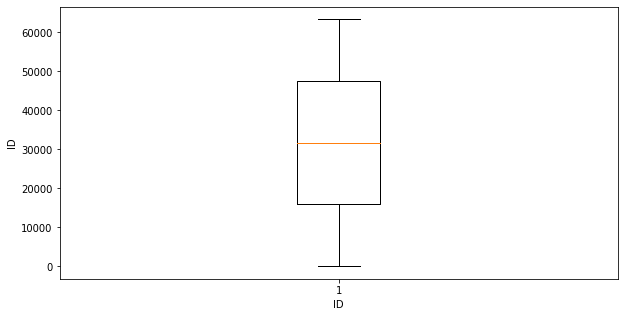

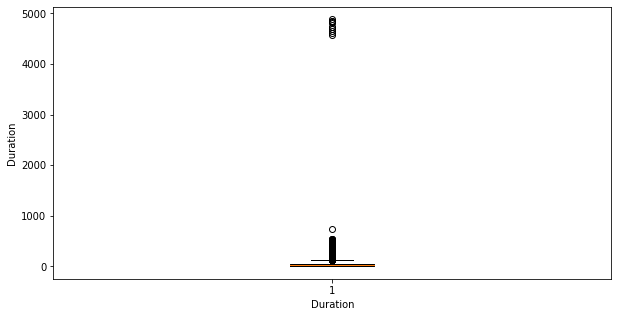

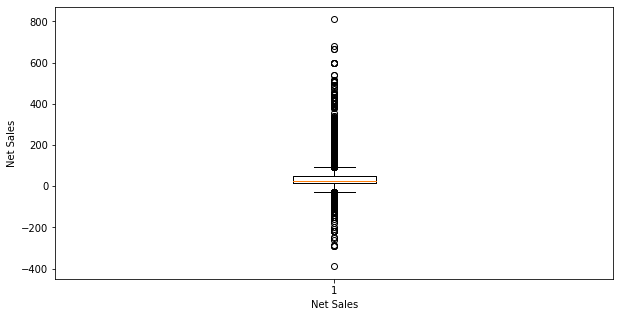

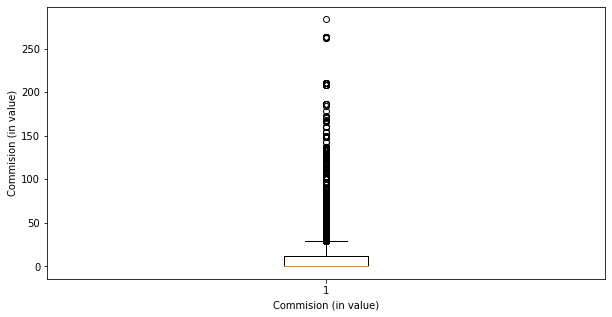

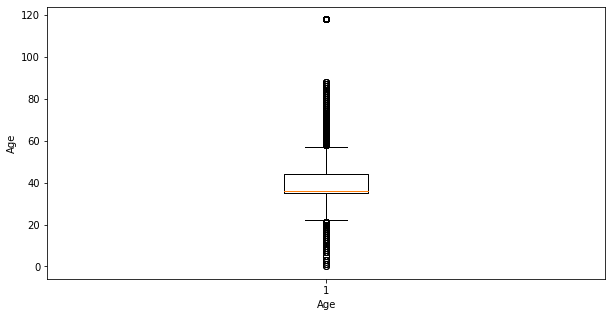

In [10]:
# box plot for outlier detection
def outlier_detection(df, var):
    fig = plt.figure(figsize=(10,5))
    plt.boxplot(df[var])
    plt.ylabel(var)
    plt.xlabel(var)

for var in cont_var:
    outlier_detection(data, var)

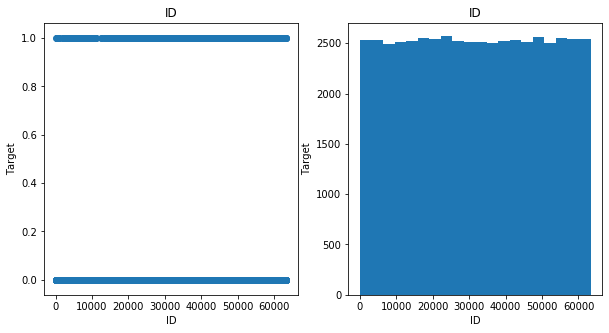

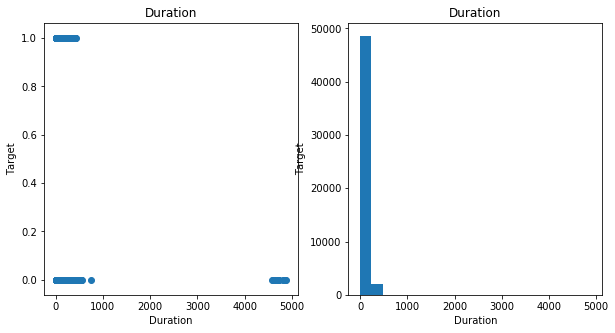

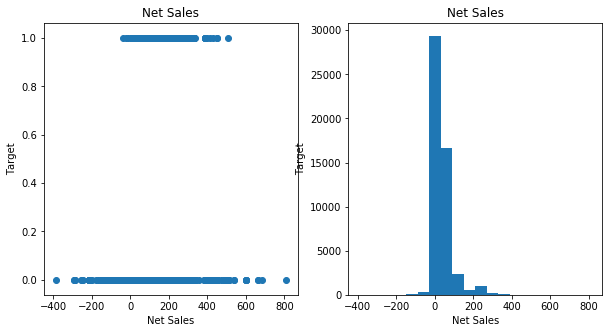

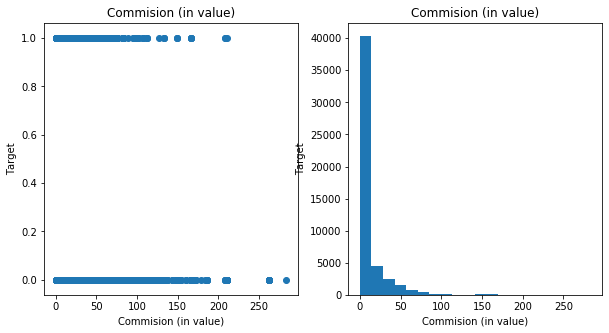

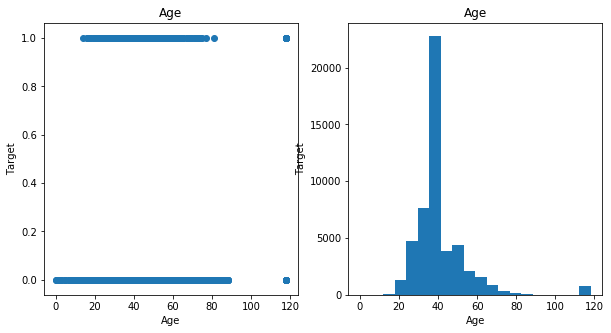

In [11]:
# Let's go ahead and analyse the distributions of these features
def analyse_continous(df, var):
    df = df.copy()
    fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    ax_1.scatter(df[var], df['Claim'])
    ax_1.set(xlabel=var, ylabel='Target')
    ax_1.set_title(var)
    ax_2.set_title(var)
    ax_2.hist(df[var],bins=20)
    ax_2.set(xlabel=var, ylabel='Target')
    plt.show()
    
for var in cont_var:
    analyse_continous(data, var)

For the above we can conclude that there is skewness and outliers in all the numerical data, which we need to takle when we will be working on feature engineering.

###  Cardinality of Categorical Features

We will now analyze categorical features.

In [12]:
# cardinality of categorical features
for var in cat_var:
    print(var, len(data[var].unique()), ' categories')

Agency 16  categories
Agency Type 2  categories
Distribution Channel 2  categories
Product Name 25  categories
Destination 102  categories
Gender 3  categories


### Analysis of Target Variable

We already know the that target variable 'Claim' is binary in nature i.e having only '0' or '1' as value. Here we will count the no of 0's and 1's, to know about the distribution of Claim.

In [13]:
# value count of the unique values in 'Claim'
data['Claim'].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

Classification is highly imbalanced.

## Conclusion of Data Analysis(EDA)

Step of EDA is completed and the following points can be concluded from EDA:

    1. Missing Values: Gender is having 71.1% of values missing, we need to impute data.
    2. In numerical values there is difference between max and min values so scaling is must.
    3. Target Varaible or 'Claim' is binary and highly imbalanced.
    4. Some values in 'Duration' and 'Net Sales' are negative which need to be dropped as these values can only          greater equal to '0'.
    5. 'ID' column is not going to contribute with any knowledge which model can learn, should be dropped.
    6. Outliers are present in numerical data and these need to be taken care of. 
    7. Encoding of categorical data is needed.
    

## Feature Engineering

In this phase we will be working on the transformation of the features to make it adequate for ML models.

### Imputing Values:

As per the EDA conclusion ID and Gender needs to be imputed

In [14]:
# imputing nan values with help of fillna
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
    
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  50553 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


### Dropping features

We will be dropping ID feature and we will drop the rows were Duration and Net Sales are negative.

In [15]:
# combining list of indices of negative Duration and negative Net Sales
comb_list = neg_net_sales + neg_dura
comb_list = list(set(comb_list))

# dropping indices
data.drop(comb_list, axis=0, inplace=True)

# droping ID column
data.drop('ID', axis=1, inplace=True)

### Outlier Removal

We will be transforming data to remove outliers as found out in data analysis phase

In [16]:
# creating list of outlier indices for age
list_age = data[data['Age'] > 100].index.tolist()
list_commission = data[data['Commision (in value)'] > 200].index.tolist()
list_netssales = data[data['Net Sales'] > 600].index.tolist()
list_duration = data[data['Duration'] > 4000].index.tolist()

# creating combined list
comb_list2 = list(set(list_age + list_commission + list_duration + list_netssales))

# dropping outliers
data.drop(index=comb_list2, axis=0, inplace=True)

# data shape
data.shape

(49176, 11)

### Scaling Data

We will be using min max scaler to scale the numerical data.

In [17]:
# scaling the numerical values
from sklearn.preprocessing import MinMaxScaler

# insatnace of min max scaler
scaler = MinMaxScaler()

# num_vars after removing ID
num_vars.remove('ID')
num_vars.remove('Claim')

# scaling data
data[num_vars] = scaler.fit_transform(data[num_vars])

# data visualization
data.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,0.009459,MALAYSIA,0.000000,0.095442,F,0.352273
1,EPX,Travel Agency,Online,Cancellation Plan,0,0.114865,SINGAPORE,0.115192,0.000000,F,0.409091
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,0.014865,MALAYSIA,0.033055,0.063628,F,0.852273
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,0.021622,INDONESIA,0.033389,0.000000,F,0.363636
4,EPX,Travel Agency,Online,Cancellation Plan,0,0.013514,"KOREA, REPUBLIC OF",0.025042,0.000000,F,0.329545
5,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,0.086486,THAILAND,0.082638,0.159070,F,0.409091
7,JZI,Airlines,Online,Basic Plan,0,0.041892,HONG KONG,0.043406,0.048739,M,0.681818
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,0.006757,AUSTRALIA,0.033055,0.063628,M,0.647727
9,EPX,Travel Agency,Online,Cancellation Plan,0,0.135135,INDONESIA,0.035058,0.000000,M,0.534091
10,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,0.095946,THAILAND,0.038397,0.000000,M,0.409091


### Cateogircal Encoding

 We will be using get_dummies from pandas for categorical encoding.

In [18]:
# Categorical Encoding
data = pd.get_dummies(data,prefix_sep='_',drop_first=False)

# visualize data
data.head()

,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Destination_ARGENTINA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BELARUS,Destination_BELGIUM,Destination_BERMUDA,Destination_BHUTAN,Destination_BOLIVIA,Destination_BRAZIL,Destination_BRUNEI DARUSSALAM,Destination_CAMBODIA,Destination_CANADA,Destination_CAYMAN ISLANDS,Destination_CHILE,Destination_CHINA,Destination_COLOMBIA,Destination_COSTA RICA,Destination_CROATIA,Destination_CYPRUS,Destination_CZECH REPUBLIC,Destination_DENMARK,Destination_EGYPT,Destination_ESTONIA,Destination_ETHIOPIA,Destination_FIJI,Destination_FINLAND,Destination_FRANCE,Destination_GEORGIA,Destination_GERMANY,Destination_GREECE,Destination_GUAM,Destination_HONG KONG,Destination_HUNGARY,Destination_ICELAND,Destination_INDIA,Destination_INDONESIA,"Destination_IRAN, ISLAMIC REPUBLIC OF",Destination_IRELAND,Destination_ISRAEL,Destination_ITALY,Destination_JAPAN,Destination_JORDAN,Destination_KAZAKHSTAN,Destination_KENYA,"Destination_KOREA, REPUBLIC OF",Destination_KUWAIT,Destination_KYRGYZSTAN,Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,Destination_LATVIA,Destination_LEBANON,Destination_LITHUANIA,Destination_LUXEMBOURG,Destination_MACAO,Destination_MALAYSIA,Destination_MALDIVES,Destination_MALTA,Destination_MAURITIUS,Destination_MEXICO,Destination_MONGOLIA,Destination_MOROCCO,Destination_MYANMAR,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Gender_F,Gender_M
0,0,0.009459,0.000000,0.095442,0.352273,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0.114865,0.115192,0.000000,0.409091,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Creating Feature Matrix

Post creating feature matrix 'X' and target label 'y'. We will be splitting feature matrix and target label.

In [19]:
# creating feature matrix 
X = data.drop('Claim', axis=1).copy()

# creating traget variable
y = data.iloc[:,0].copy()

In [20]:
# visualize X
X.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Destination_ARGENTINA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BELARUS,Destination_BELGIUM,Destination_BERMUDA,Destination_BHUTAN,Destination_BOLIVIA,Destination_BRAZIL,Destination_BRUNEI DARUSSALAM,Destination_CAMBODIA,Destination_CANADA,Destination_CAYMAN ISLANDS,Destination_CHILE,Destination_CHINA,Destination_COLOMBIA,Destination_COSTA RICA,Destination_CROATIA,Destination_CYPRUS,Destination_CZECH REPUBLIC,Destination_DENMARK,Destination_EGYPT,Destination_ESTONIA,Destination_ETHIOPIA,Destination_FIJI,Destination_FINLAND,Destination_FRANCE,Destination_GEORGIA,Destination_GERMANY,Destination_GREECE,Destination_GUAM,Destination_HONG KONG,Destination_HUNGARY,Destination_ICELAND,Destination_INDIA,Destination_INDONESIA,"Destination_IRAN, ISLAMIC REPUBLIC OF",Destination_IRELAND,Destination_ISRAEL,Destination_ITALY,Destination_JAPAN,Destination_JORDAN,Destination_KAZAKHSTAN,Destination_KENYA,"Destination_KOREA, REPUBLIC OF",Destination_KUWAIT,Destination_KYRGYZSTAN,Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,Destination_LATVIA,Destination_LEBANON,Destination_LITHUANIA,Destination_LUXEMBOURG,Destination_MACAO,Destination_MALAYSIA,Destination_MALDIVES,Destination_MALTA,Destination_MAURITIUS,Destination_MEXICO,Destination_MONGOLIA,Destination_MOROCCO,Destination_MYANMAR,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Gender_F,Gender_M
0,0.009459,0.000000,0.095442,0.352273,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.114865,0.115192,0.000000,0.409091,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [21]:
# visualize y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

### Test-Train Split

In [22]:
# importing test train split
from sklearn.model_selection import train_test_split
# creating train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## Conclusion 

The conclusion of Feature Engineering phase is that we have sets of Training and test dataset.

## Feature Selection

We will try different methods of feature selection to get the adequate set of features. Here we are taking correlation threshold to be 0.5, that is to filter out features highly correlated to target variable.

In [23]:
# finding correlation, as we need to find correlation between target(class) we are adding class in X_train
X_train['Class'] = y_train.copy()

# finding correlation in the data set, storing the correlation of the target with respect to features in t_corr
t_corr = X_train.corr()
t_corr = t_corr['Class']

# analyze the t_corr values
t_corr.abs().describe()

count    150.000000
mean       0.021123
std        0.085349
min        0.000040
25%        0.001749
50%        0.004412
75%        0.012418
max        1.000000
Name: Class, dtype: float64

In [24]:
# dropping 'Class' from X_train
X_train.drop('Class', axis=1, inplace=True)

## Conclusion of Feature Selection Phase

For the above analysis of the correlation values we can conclued that all features need to be used for modelling, its not possible to filter out features based on a threshold of greater than 0.5. We will be trying RFE for feature selection during the process of model training.

In [ ]:
import seaborn as sns
sns.pairplot(X_train, hue=y_train)
plt.show()


## Model Training and Hyperparameter Tunning

In [25]:
# importing logistic regression and ROC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# creating instance of logistic regression
lr = LogisticRegression(random_state=8)

# fitting the model training data
lr.fit(X_train, y_train)

# predicting the result of the model for X_test
y_predict_lr = lr.predict(X_test)

# ROC_AUC score
roc_score_lr = roc_auc_score(y_test, y_predict_lr)

# print roc score
print('The ROC AUC score for the model is : ', roc_score_lr)


The ROC AUC score for the model is :  0.5
